# Using ARIMA model to apply Auto-Regression to dataset

In [1]:
import pandas as pd

dataset: pd.DataFrame = pd.read_csv('../data/processed/global_death_per_country.csv', index_col=0, parse_dates=True).fillna(0)

## Using Italy's death to test out the model

<AxesSubplot:>

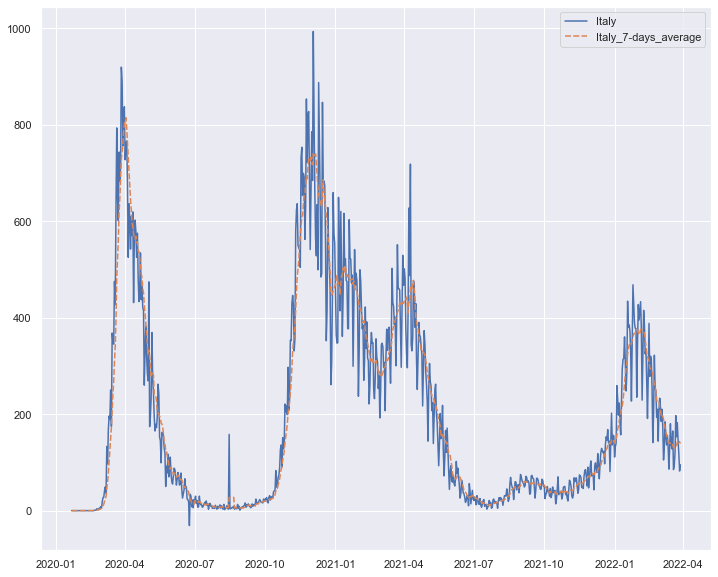

In [2]:
import seaborn as sns

sns.set(rc={'figure.figsize':(12,10)})
sns.set_theme()

sns.lineplot(data=[dataset["Italy"], dataset["Italy_7-days_average"]])

[Text(0.5, 1.0, 'Train/Test set')]

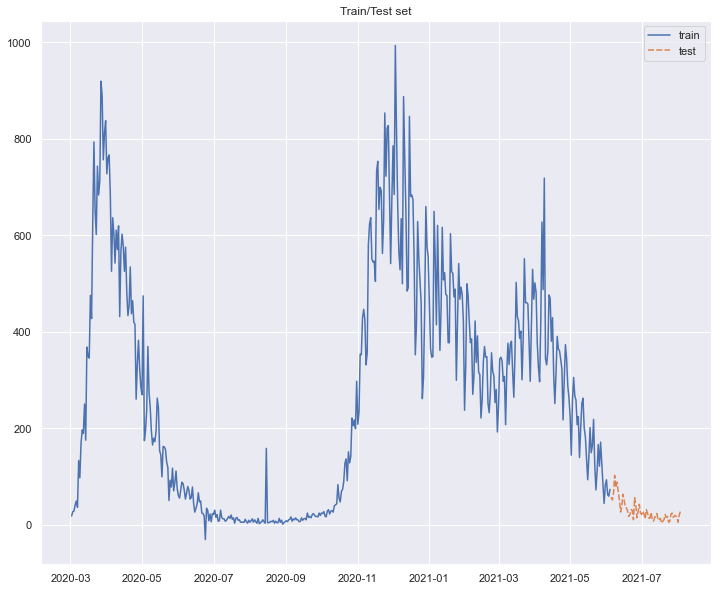

In [3]:
import pmdarima as pm
from tqdm import tqdm
from sklearn.metrics import mean_squared_error
import numpy as np

INPUT_WINDOW = [40,500]
OUTPUT_WINDOW = 60
train = dataset["Italy"][INPUT_WINDOW[0]:INPUT_WINDOW[1]]
test = dataset["Italy"][INPUT_WINDOW[1]:INPUT_WINDOW[1] + OUTPUT_WINDOW].rename("ground truth")

a = pd.concat([train, test], axis=1)
a.columns=["train", "test"]
sns.lineplot(data=a).set(title="Train/Test set")

In [ ]:
MAX_M: int = 40
costs = []
with tqdm(total=MAX_M) as pbar:
    for m in range(1,MAX_M):
        pbar.set_description(f"training with {m=}")
        model = pm.auto_arima(train, m=m)

        # predicting
        raw_preds = model.predict(OUTPUT_WINDOW)
        preds = pd.DataFrame(raw_preds, index=test.index[:OUTPUT_WINDOW], columns=["predictions"])

        # biding to input
        costs.append(np.sqrt(mean_squared_error(test, preds)))
        pbar.update()

print(f"Best value for m : {np.argmax(costs) + 1}")

In [5]:
model = pm.auto_arima(train,m=10)

# predicting
raw_preds = model.predict(OUTPUT_WINDOW)
preds = pd.DataFrame(raw_preds, index=test.index[:OUTPUT_WINDOW], columns=["predictions"])
preds = pd.concat([pd.DataFrame(train.tail(1).rename("predictions")), preds])

<AxesSubplot:>

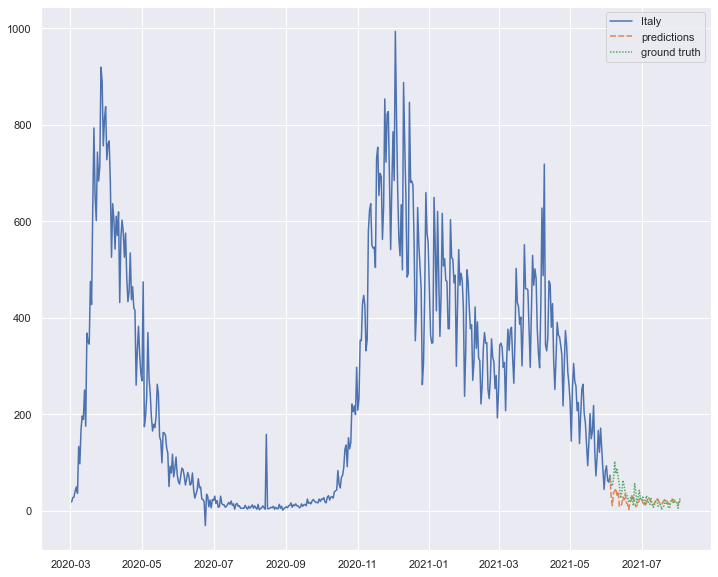

In [6]:
ground_truth = pd.concat([train.tail(1), test]).rename("ground truth")

sns.lineplot(data=pd.concat([train, preds, ground_truth], axis=1))

In [7]:
np.sqrt(mean_squared_error(preds, ground_truth))

19.26850552228861